# SLU12: Feature Engineering (aka Real World Data): Examples notebook
---

In this notebook we will cover the following:
* Types of statistical data
* Dealing with numerical features
* Dealing with categorical features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
avengers = pd.read_csv('data/avengers.csv')

# 2. Types of data in Pandas

## 2.1. Numerical and object dtypes

In [3]:
avengers.dtypes

Name            object
Active          object
Gender          object
Membership      object
Universe        object
Appearances      int64
TotalDeaths      int64
TotalReturns     int64
dtype: object

In [4]:
(avengers.select_dtypes(include='object')
         .head(3))

,Name,Active,Gender,Membership,Universe
0,"Henry Jonathan ""Hank"" Pym",YES,MALE,Full,Earth-616
1,Janet van Dyne,YES,FEMALE,Full,Earth-616
2,"Anthony Edward ""Tony"" Stark",YES,MALE,Full,Earth-616


## 2.2. Category dtype

In [5]:
avengers_cat = avengers.copy()
avengers_cat = avengers_cat.assign(Universe=avengers['Universe'].astype('category'))

In [6]:
avengers_cat['Universe'].cat.categories

Index(['Earth-13034', 'Earth-616', 'Earth-6311', 'Earth-691', 'Earth-8009',
       'Earth-921', 'Earth-96020'],
      dtype='object')

In [7]:
avengers_cat['Universe'].cat.ordered

False

### Ordinal data

In [8]:
avengers_ord = avengers.copy()
avengers_ord = avengers_ord.assign(Membership=avengers['Membership'].astype('category'))

avengers_ord['Membership'].cat.categories

Index(['Academy', 'Full', 'Honorary', 'Probationary'], dtype='object')

,Name,Active,Gender,Membership,Universe,Appearances,TotalDeaths,TotalReturns
0,"Henry Jonathan ""Hank"" Pym",YES,MALE,Full,Earth-616,1269,1,0
1,Janet van Dyne,YES,FEMALE,Full,Earth-616,1165,1,1
2,"Anthony Edward ""Tony"" Stark",YES,MALE,Full,Earth-616,3068,1,1
3,Robert Bruce Banner,YES,MALE,Full,Earth-616,2089,1,1
4,Thor Odinson,YES,MALE,Full,Earth-616,2402,2,1
...,...,...,...,...,...,...,...,...
150,Eric Brooks,YES,MALE,Full,Earth-616,198,0,0
151,Adam Brashear,YES,MALE,Full,Earth-616,29,0,0
152,Victor Alvarez,YES,MALE,Full,Earth-616,45,0,0
153,Ava Ayala,YES,FEMALE,Full,Earth-616,49,0,0


In [10]:
ordered_cats = ['Honorary', 'Academy', 'Probationary', 'Full']
avengers_ord = avengers_ord.assign(Membership=avengers_ord['Membership'].cat.set_categories(ordered_cats, ordered=True))

avengers_ord['Membership'].min(), avengers_ord['Membership'].max()

('Honorary', 'Full')

# 3. Types of statistical data

## 3.1. Dealing with numerical data

### 3.1.1. Introducing sklearn-like transformers

In [11]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

### 3.1.2. Discretization of numerical data

#### Binning

In [12]:
# save column as a dataframe, as required by the transformer
X = avengers[['Appearances']]

# initialize transformer with desired options
binner = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

# fit transformer to data
binner.fit(X)

# create new feature by transforming the data
avengers['Appearances_bins'] = binner.transform(X)

In [13]:
binner.bin_edges_

array([array([2.0000e+00, 4.3510e+02, 8.6820e+02, 1.3013e+03, 1.7344e+03,
              2.1675e+03, 2.6006e+03, 3.0337e+03, 3.4668e+03, 3.8999e+03,
              4.3330e+03])                                               ],
      dtype=object)

#### Binarization

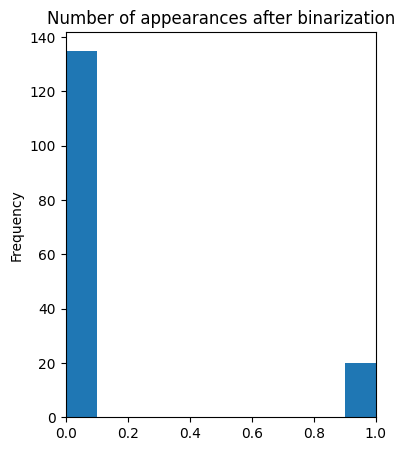

In [14]:
# initialize transformer with desired options
binarizer = Binarizer(threshold = 1000)

# save data to binarize
X = avengers[['Appearances']]

# fit transformer to data
binarizer.fit(X)

# create new feature by transforming the data
avengers['Appearances_binary'] = binarizer.transform(X)

# plot histogram
avengers['Appearances_binary'].plot.hist(figsize=(4, 5));
plt.xlim(0,1);
plt.title('Number of appearances after binarization');

### 3.1.3. Scaling of numerical data

#### [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler)

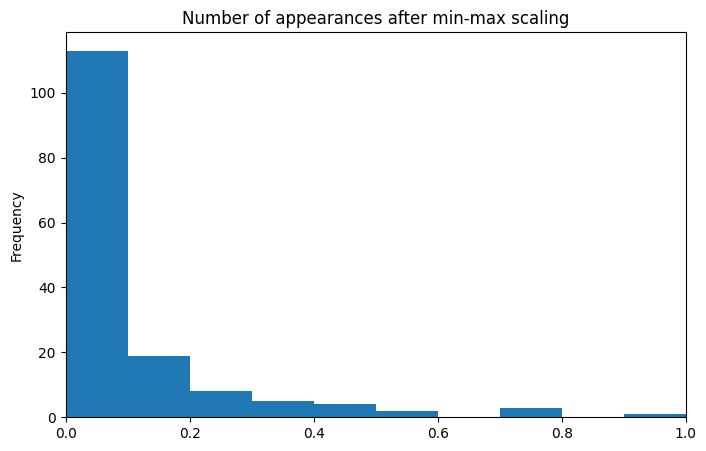

In [15]:
# initialize transformer with desired options
minmaxscaler = MinMaxScaler(feature_range=(0,1))

# save data to scale
X = avengers[['Appearances']]

# fit transformer to data
minmaxscaler.fit(X)

# create new feature by transforming the data
avengers['Appearances_minmax'] = minmaxscaler.transform(X)

# plot histogram
avengers['Appearances_minmax'].plot.hist(figsize=(8, 5));
plt.xlim(0, 1);
plt.title('Number of appearances after min-max scaling');

#### [Normalizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html)

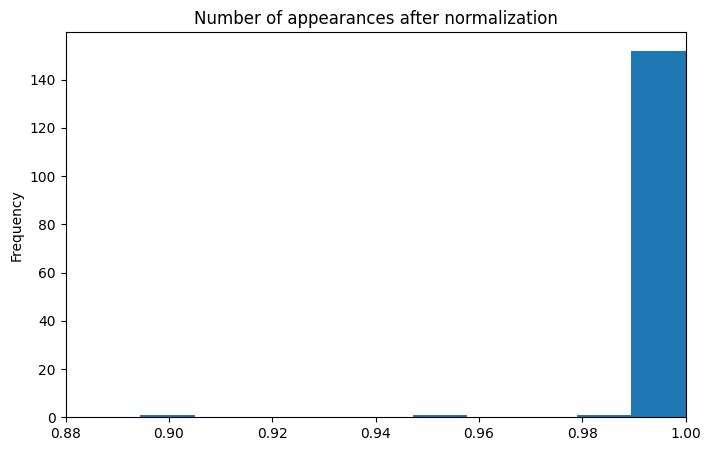

In [16]:
# initialize transformer with desired options
normalizer = Normalizer(norm='l2')

# save numerical columns to normalize
X = avengers[['Appearances', 'TotalDeaths', 'TotalReturns']]

# fit transformer to data
normalizer.fit(X)

# create new features by transforming the data
X_normalized = normalizer.transform(X)  # recall that output is a numpy array
avengers['Appearances_normalized'] = X_normalized[:, 0]
avengers['TotalDeaths_normalized'] = X_normalized[:, 1]
avengers['TotalReturns_normalized'] = X_normalized[:, 2]

# plot histogram of normalized appearances
avengers['Appearances_normalized'].plot.hist(figsize=(8, 5));
plt.xlim(0.88, 1);
plt.title('Number of appearances after normalization');

#### [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

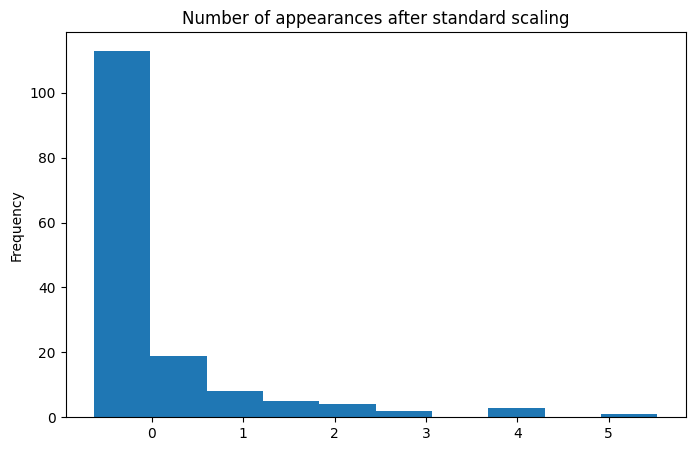

In [17]:
# initialize transformer with desired options
standardscaler = StandardScaler()

# save data to scale
X = avengers[['Appearances']]

# fit transformer to data
standardscaler.fit(X)

# create new feature by transforming the data
avengers['Appearances_standard_scaled'] = standardscaler.transform(X)

# plot histogram
avengers['Appearances_standard_scaled'].plot.hist(figsize=(8, 5));
plt.title('Number of appearances after standard scaling');

#### [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler)

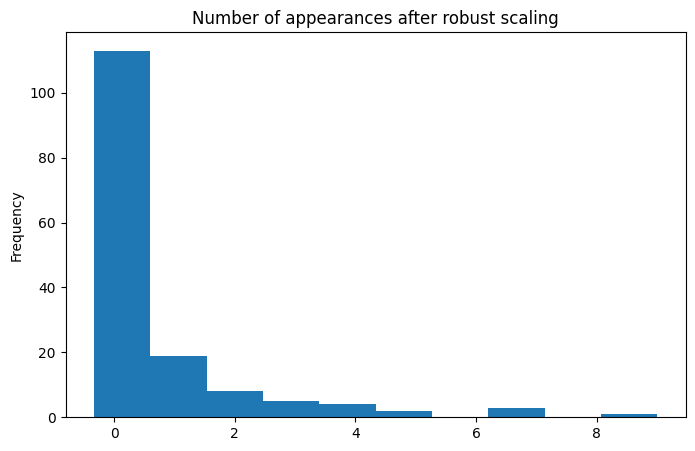

In [18]:
# initialize transformer with desired options
robustscaler = RobustScaler()

# save data to scale
X = avengers[['Appearances']]

# fit transformer to data
robustscaler.fit(X)

# create new feature by transforming the data
avengers['Appearances_robust_scaled'] = robustscaler.transform(X)

# plot histogram
avengers['Appearances_robust_scaled'].plot.hist(figsize=(8, 5));
plt.title('Number of appearances after robust scaling');

## 3.2. Dealing with categorical data

### 3.2.1. Binary data

In [19]:
avengers = pd.read_csv('data/avengers.csv')

(avengers.assign(Active_mapped = avengers['Active'].map({'YES': 1, 'NO': 0}),
                 Gender_mapped = avengers['Gender'].map({'MALE': 1, 'FEMALE': 0}))
         .sample(5))

,Name,Active,Gender,Membership,Universe,Appearances,TotalDeaths,TotalReturns,Active_mapped,Gender_mapped
42,John F. Walker,NO,MALE,Full,Earth-616,352,0,0,0,1
71,Crystal Amaquelin Maximoff,NO,FEMALE,Full,Earth-616,517,0,0,0,0
24,Charlie-27,NO,MALE,Honorary,Earth-691,132,0,0,0,1
18,Patsy Walker,NO,FEMALE,Full,Earth-616,557,1,1,0,0
125,Michiko Musashi,YES,FEMALE,Academy,Earth-616,94,0,0,1,0


### 3.2.2. Enconding categorical features

In [20]:
import category_encoders as ce

#### Ordinal encoding

In [21]:
# initialize transformer with desired options
ordinalencoder = ce.ordinal.OrdinalEncoder()

# save data to scale (no need to reshape)
X = avengers[['Universe']]

# fit transformer to data
ordinalencoder.fit(X)

# create new feature by transforming the data
X_encoded = ordinalencoder.transform(X)
X_encoded.sample(5, random_state=9)

,Universe
73,4
51,3
89,1
122,1
26,2


In [22]:
ordinalencoder.category_mapping

[{'col': 'Universe',
  'mapping': Earth-616      1
  Earth-691      2
  Earth-6311     3
  Earth-921      4
  Earth-96020    5
  Earth-8009     6
  Earth-13034    7
  NaN           -2
  dtype: int64,
  'data_type': dtype('O')}]

#### One-hot encoding

In [23]:
# initialize transformer with desired options
ohe = ce.one_hot.OneHotEncoder(use_cat_names=True, handle_unknown='indicator')

# save data to scale (no need to reshape)
X = avengers[['Universe']]

# fit transformer to data
ohe.fit(X)

# create new feature by transforming the data
X_ohe = ohe.transform(X)
X_ohe.sample(5, random_state=9)

,Universe_Earth-616,Universe_Earth-691,Universe_Earth-6311,Universe_Earth-921,Universe_Earth-96020,Universe_Earth-8009,Universe_Earth-13034,Universe_-1
73,0,0,0,1,0,0,0,0
51,0,0,1,0,0,0,0,0
89,1,0,0,0,0,0,0,0
122,1,0,0,0,0,0,0,0
26,0,1,0,0,0,0,0,0
